# <center>Training a Centralized Machine Learning Model</center>

In this phase, we'll train a centralized machine learning (ML) model, where all data is aggregated in a single location for training. This approach allows for efficient computation, global optimization, and full access to the dataset, enabling the model to learn from all available patterns without constraints on data sharing.  

However, in real-world scenarios, centralized ML can face `privacy concerns`, data silos, and scalability challenges—which is where decentralized ML methods like **Federated Learning** become relevant. After benchmarking the centralized model, we will compare its performance, efficiency, and trade-offs against a decentralized ML setup.

---- 

<br><p> 

In this experiment, I'll explore the performance differences between **centralized (global & private), and federated learning models.  

- **Global Model:** The data from five different banks are pooled together into a single dataset to train a shared model.  
- **Partial Model:** Each bank trains its own model independently using only its in-house data  
- **Federated Learning:** Banks collaboratively train a global model while keeping their data decentralized and private.  

By comparing these approaches, we aim to assess the performance trade-offs and privacy benefits of federated learning against traditional centralized training.

<br><p> 

### Global Model Training

In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import sys 
sys.path.append("../")

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import f1_score, confusion_matrix, classification_report, recall_score

import optuna

from src.config import BASE_DATA_DOWNSAMPLED
from src.local_utility import preprocess_data

In [3]:
cmap = sns.color_palette('Blues_r') 

In [4]:
base_df = pd.read_csv(BASE_DATA_DOWNSAMPLED)
base_df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.542100,-1,135,50,0.640988,17.871990,AA,1949,...,0,200.0,0,INTERNET,11.113155,windows,0,2,0,1
1,0,0.1,0.808256,-1,36,20,0.004131,-1.352208,AB,4813,...,1,200.0,0,INTERNET,1.688691,other,1,1,0,2
2,0,0.9,0.519892,26,0,30,0.002854,-0.272235,AC,614,...,1,200.0,0,INTERNET,5.759309,linux,1,1,0,7
3,0,0.7,0.703134,29,10,20,28.455842,50.907125,AA,803,...,0,200.0,0,INTERNET,2.224941,windows,1,1,0,0
4,0,0.5,0.891981,-1,25,40,0.015391,-0.841964,AC,1503,...,0,200.0,0,INTERNET,1.712628,linux,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60473,0,0.9,0.557319,-1,15,30,0.034043,-1.194483,AB,747,...,0,200.0,0,INTERNET,1.064043,other,0,1,0,4
60474,0,0.6,0.112006,-1,66,20,0.881187,-1.260812,AC,3296,...,0,200.0,0,INTERNET,7.445418,linux,1,1,0,0
60475,0,0.7,0.081777,-1,61,30,0.004880,-0.917024,AB,872,...,1,200.0,0,INTERNET,5.517186,linux,0,1,0,7
60476,0,0.2,0.198698,-1,364,20,0.008743,52.471249,AA,893,...,0,200.0,0,INTERNET,1.514086,other,0,1,0,5


In [5]:
X = base_df.drop("fraud_bool", axis=1)
y = base_df["fraud_bool"]

In [6]:
df_encoded, _ = preprocess_data(base_df)

In [7]:
X_encoded = df_encoded.drop("fraud_bool", axis=1)
y_encoded = df_encoded["fraud_bool"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

----
## Model Training

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier

In [10]:
from src.train_centralized import train_predict

In [11]:
model1 = LogisticRegression(random_state=42)


Train Accuracy: 0.87 | Test Accuracy: 0.87 | Recall: 0.47 | Precision: 0.71 | ROC-AUC: 0.87

ROC-AUC After 3-Fold Cross Validation:  0.87

 ___________________________________________________________________________________________________ 



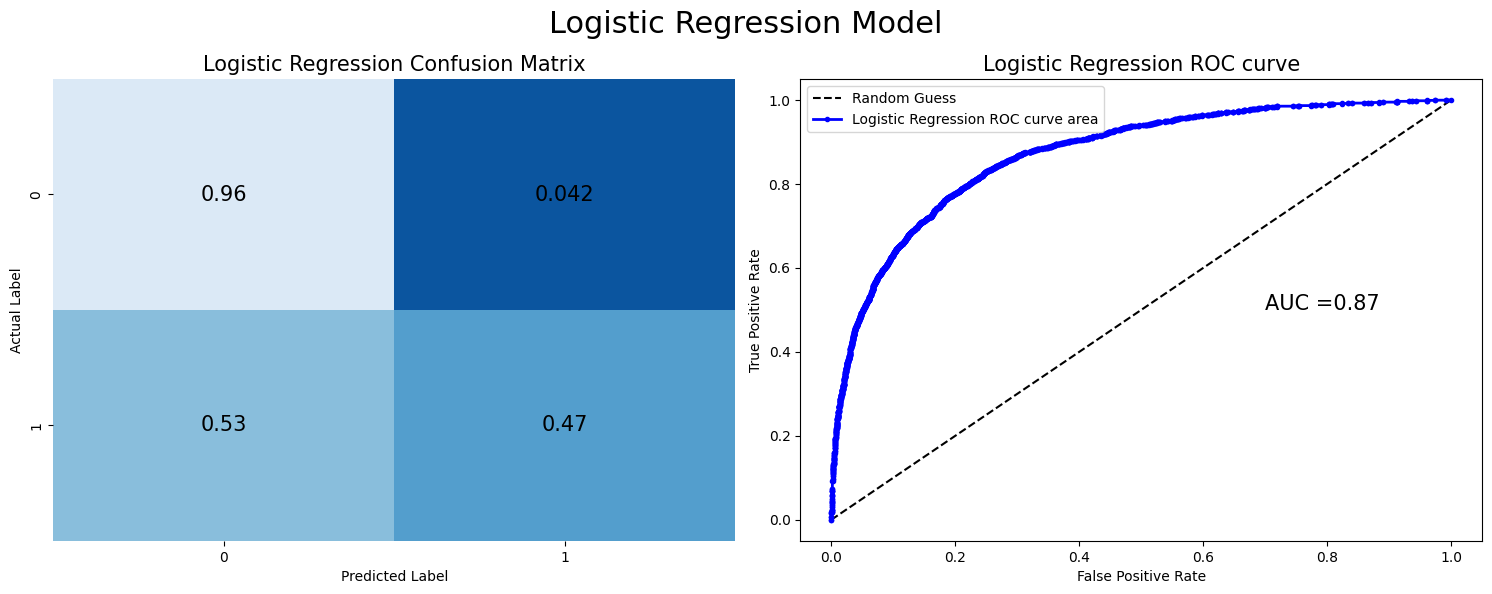

___________________________________________________________________________________________________ 

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      9927
           1       0.71      0.47      0.56      2169

    accuracy                           0.87     12096
   macro avg       0.80      0.71      0.74     12096
weighted avg       0.86      0.87      0.86     12096

___________________________________________________________________________________________________

train_predict took 2.08 secs to execute



In [12]:
result = train_predict(model1, X_train, y_train, X_test, y_test, model_name="Logistic Regression")

In [13]:
model2 = RandomForestClassifier(random_state=42)


Train Accuracy: 1.00 | Test Accuracy: 0.87 | Recall: 0.42 | Precision: 0.74 | ROC-AUC: 0.88

ROC-AUC After 3-Fold Cross Validation:  0.87

 ___________________________________________________________________________________________________ 



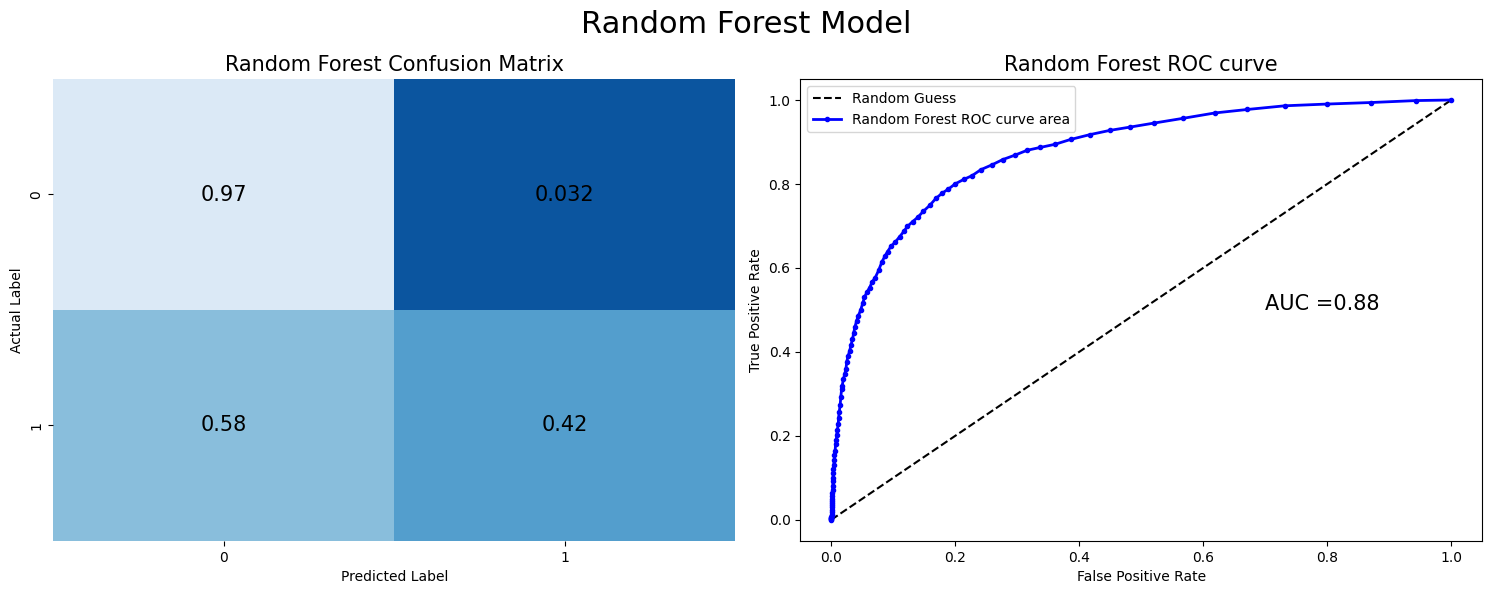

___________________________________________________________________________________________________ 

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      9927
           1       0.74      0.42      0.53      2169

    accuracy                           0.87     12096
   macro avg       0.81      0.69      0.73     12096
weighted avg       0.86      0.87      0.85     12096

___________________________________________________________________________________________________

train_predict took 61.43 secs to execute



In [14]:
result = train_predict(model2, X_train, y_train, X_test, y_test, model_name="Random Forest")

In [15]:
model3 = XGBClassifier(random_state=42)


Train Accuracy: 0.94 | Test Accuracy: 0.87 | Recall: 0.52 | Precision: 0.69 | ROC-AUC: 0.89

ROC-AUC After 3-Fold Cross Validation:  0.87

 ___________________________________________________________________________________________________ 



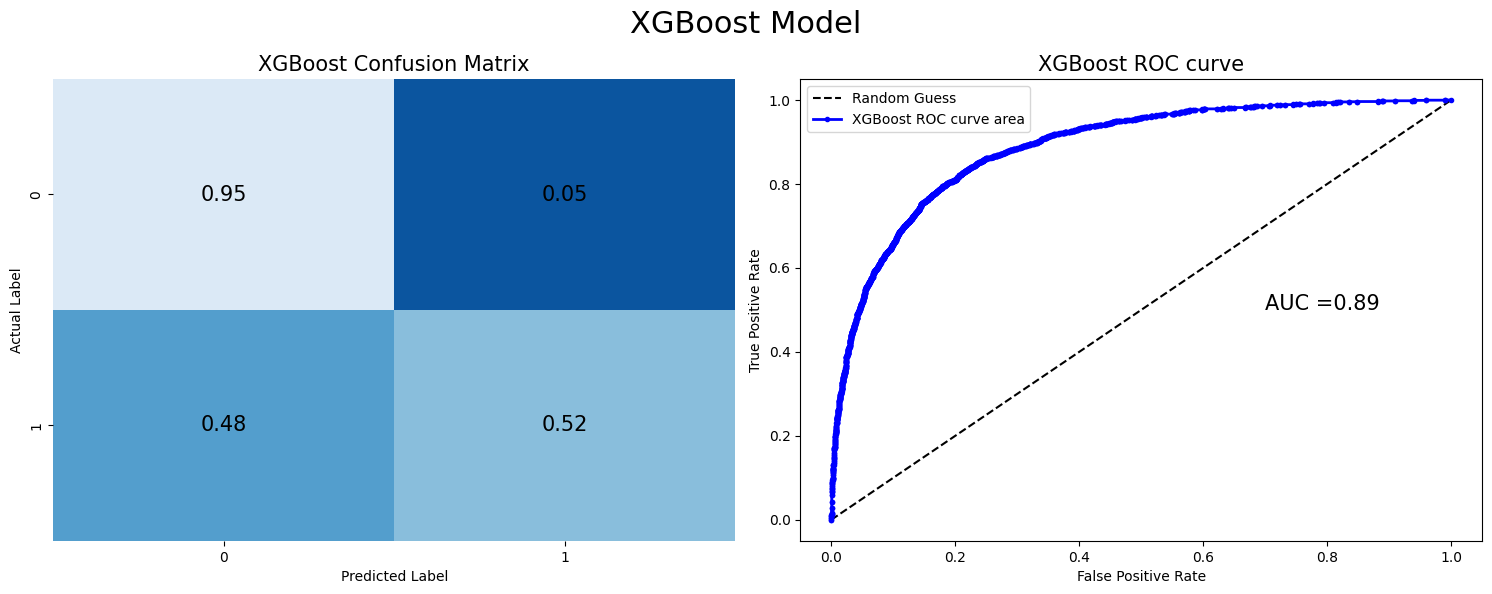

___________________________________________________________________________________________________ 

XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      9927
           1       0.69      0.52      0.59      2169

    accuracy                           0.87     12096
   macro avg       0.80      0.73      0.76     12096
weighted avg       0.86      0.87      0.86     12096

___________________________________________________________________________________________________

train_predict took 9.79 secs to execute



In [16]:
result = train_predict(model3, X_train, y_train, X_test, y_test, model_name="XGBoost")

In [17]:
model4 = LGBMClassifier(random_state=42, verbose=0)


Train Accuracy: 0.90 | Test Accuracy: 0.88 | Recall: 0.52 | Precision: 0.72 | ROC-AUC: 0.89

ROC-AUC After 3-Fold Cross Validation:  0.88

 ___________________________________________________________________________________________________ 



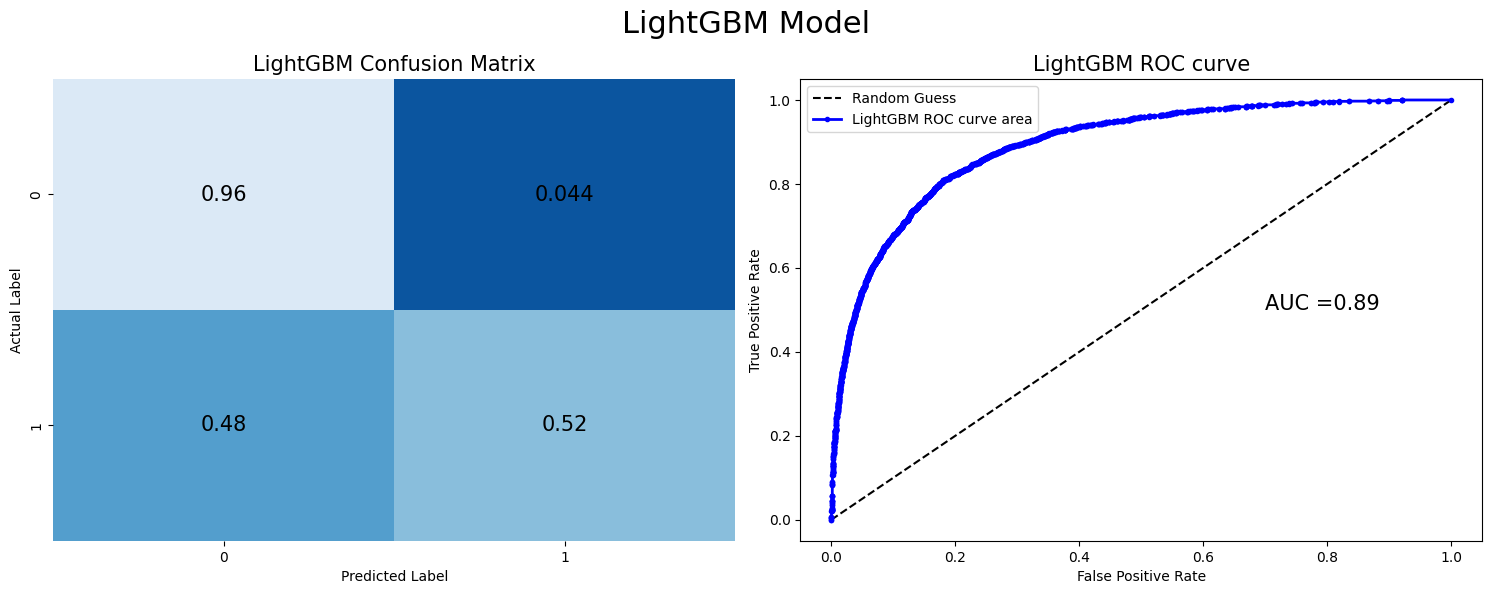

___________________________________________________________________________________________________ 

LightGBM Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      9927
           1       0.72      0.52      0.60      2169

    accuracy                           0.88     12096
   macro avg       0.81      0.74      0.76     12096
weighted avg       0.87      0.88      0.87     12096

___________________________________________________________________________________________________

train_predict took 5.13 secs to execute



In [18]:
result = train_predict(model4, X_train, y_train, X_test, y_test, model_name="LightGBM")

In [19]:
pd.DataFrame(result) 

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,3-Fold CV ROC-AUC
0,Logistic Regression,0.87,0.71,0.47,0.56,0.87,0.87
1,Random Forest,0.87,0.74,0.42,0.53,0.88,0.87
2,XGBoost,0.87,0.69,0.52,0.59,0.89,0.87
3,LightGBM,0.88,0.72,0.52,0.60,0.89,0.88


---- 

## Hyperparameter Tunning

In [20]:
from src.train_centralized import objective

In [21]:
optuna_result = {}

In [24]:
%%time

# Run Optimization For XGBoost
study = optuna.create_study(direction="maximize")
study.optimize(objective(X_train, y_train, "XGBoost"), n_trials=5)

# Best Results XGBoost
best_params_xgb =  study.best_params                   #<--- Access the best hyperparameters
print("Best Hyperparameters:", study.best_params)
print("Best ROC-AUC Score:", study.best_value)

optuna_result['xgb'] = best_params_xgb 

[I 2025-02-04 19:26:59,614] A new study created in memory with name: no-name-236618d4-4896-4ebb-8bd0-248cbe6b8cd3
[I 2025-02-04 19:33:07,847] Trial 0 finished with value: 0.8740571093370825 and parameters: {'n_estimators': 14000, 'max_depth': 8, 'learning_rate': 0.06424833320719123, 'min_child_weight': 3, 'subsample': 0.6, 'scale_pos_weight': 3.0797873894820724, 'colsample_bytree': 0.8}. Best is trial 0 with value: 0.8740571093370825.
[I 2025-02-04 19:53:09,174] Trial 1 finished with value: 0.8751343253498242 and parameters: {'n_estimators': 87000, 'max_depth': 9, 'learning_rate': 0.030862584186718646, 'min_child_weight': 2, 'subsample': 0.6, 'scale_pos_weight': 2.9850366232856604, 'colsample_bytree': 0.6}. Best is trial 1 with value: 0.8751343253498242.
[I 2025-02-05 00:46:49,429] Trial 2 finished with value: 0.8809996240997015 and parameters: {'n_estimators': 39000, 'max_depth': 9, 'learning_rate': 0.006906386491354966, 'min_child_weight': 2, 'subsample': 0.6, 'scale_pos_weight': 4.9

Best Hyperparameters: {'n_estimators': 39000, 'max_depth': 9, 'learning_rate': 0.006906386491354966, 'min_child_weight': 2, 'subsample': 0.6, 'scale_pos_weight': 4.969734022924721, 'colsample_bytree': 0.8}
Best ROC-AUC Score: 0.8809996240997015
CPU times: total: 1h 18min 26s
Wall time: 5h 57min 12s


----

In [ ]:
%%time

# Run Optimization For Random Forest
study = optuna.create_study(direction="maximize")
study.optimize(objective(X_train, y_train, "Random Forest"), n_trials=5)

# Best Results Random Forest
best_params_rf =  study.best_params                   #<--- Access the best hyperparameters
print("Best Hyperparameters:", study.best_params)
print("Best ROC-AUC Score:", study.best_value)   

optuna_result['rf'] = best_params_rf

----

In [ ]:
%%time

# Run Optimization For LightGBM
study = optuna.create_study(direction="maximize")
study.optimize(objective(X_train, y_train, "LightGBM"), n_trials=5)

# Best Results LightGBM
best_params_lgbm =  study.best_params                   #<--- Access the best hyperparameters
print("Best Hyperparameters:", study.best_params)
print("Best ROC-AUC Score:", study.best_value)   

optuna_result['lgbm'] = best_params_lgbm

---- 

## Partial Model Training

<br><p>

Partial model training refers to a setup where each organization (e.g., a bank) trains its own **in-house model** using only its **private dataset**, without sharing data with others. Unlike global training, where data from multiple sources is combined, each institution maintains **data privacy** while optimizing its model independently. This approach ensures **data security** but may lead to limited generalization compared to models trained on diverse datasets.


<br><p> 

------  

In [21]:
from src.paths import CLIENTS_DATA_DIR
from src.local_utility import load_client_data
from src.train_centralized import train_predict
from src.config import SERVER_CONFIG

In [22]:
# Load Datasets 

num_clients = SERVER_CONFIG['num_clients']
train_sets = []
val_sets = []

for i in range(num_clients):
    x_train = pd.read_csv(f"{CLIENTS_DATA_DIR}/X_train_{i}.csv") 
    y_train = pd.read_csv(f"{CLIENTS_DATA_DIR}/y_train_{i}.csv")
    x_val =  pd.read_csv(f"{CLIENTS_DATA_DIR}/X_val_{i}.csv") 
    y_val =  pd.read_csv(f"{CLIENTS_DATA_DIR}/y_val_{i}.csv") 

    train_sets.append((x_train, y_train))
    val_sets.append((x_val, y_val))

test_set = [
    pd.read_csv(f"{CLIENTS_DATA_DIR}/X_test.csv"), 
    pd.read_csv(f"{CLIENTS_DATA_DIR}/y_test.csv")
]

X_test, y_test = test_set


Train Accuracy: 1.00 | Test Accuracy: 0.80 | Recall: 0.69 | Precision: 0.69 | ROC-AUC: 0.87

ROC-AUC After 3-Fold Cross Validation:  0.85

 ___________________________________________________________________________________________________ 



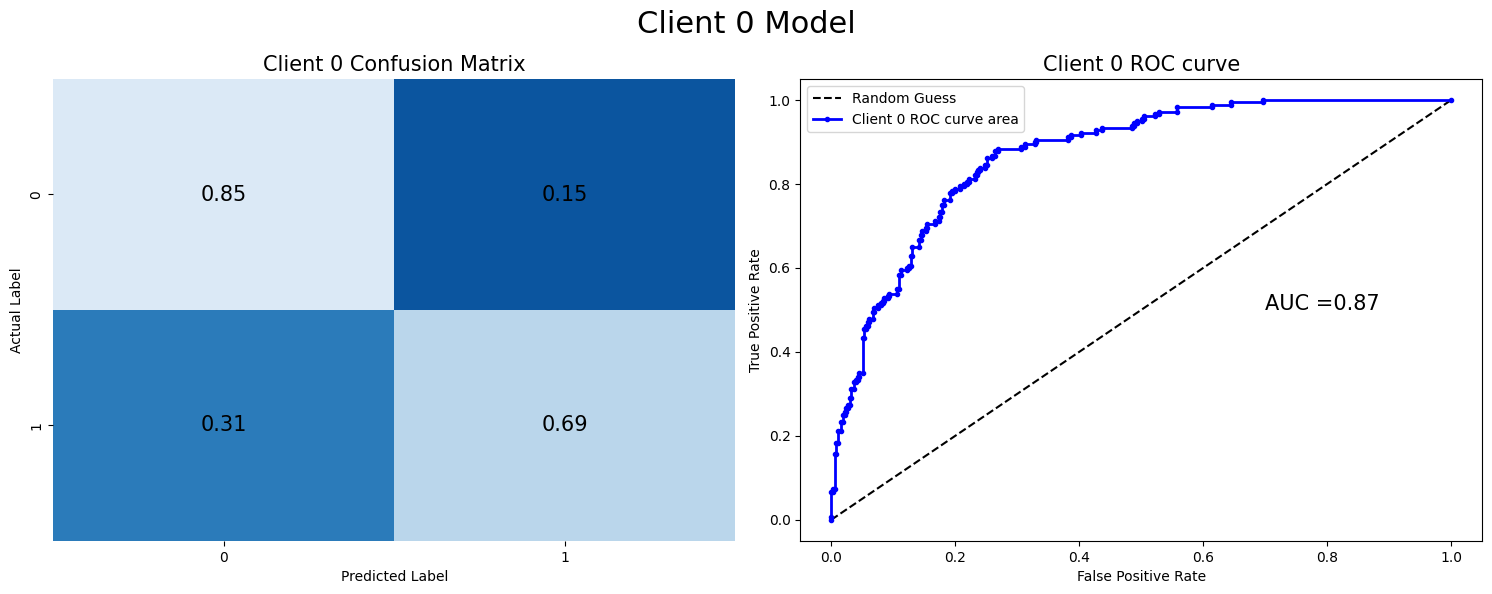

___________________________________________________________________________________________________ 

Client 0 Classification Report
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       375
           1       0.69      0.69      0.69       180

    accuracy                           0.80       555
   macro avg       0.77      0.77      0.77       555
weighted avg       0.80      0.80      0.80       555

___________________________________________________________________________________________________

train_predict took 2.94 secs to execute


Train Accuracy: 1.00 | Test Accuracy: 0.82 | Recall: 0.68 | Precision: 0.72 | ROC-AUC: 0.87

ROC-AUC After 3-Fold Cross Validation:  0.84

 ___________________________________________________________________________________________________ 



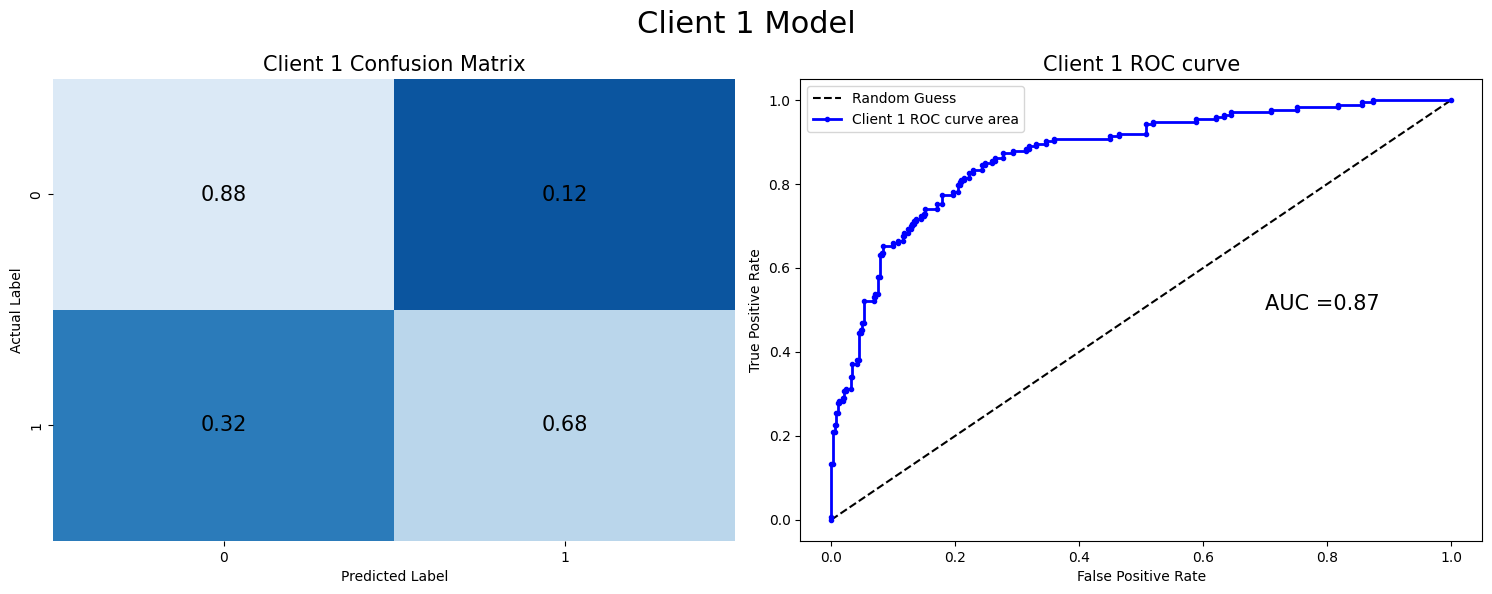

___________________________________________________________________________________________________ 

Client 1 Classification Report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       382
           1       0.72      0.68      0.70       173

    accuracy                           0.82       555
   macro avg       0.79      0.78      0.78       555
weighted avg       0.82      0.82      0.82       555

___________________________________________________________________________________________________

train_predict took 3.03 secs to execute


Train Accuracy: 1.00 | Test Accuracy: 0.79 | Recall: 0.68 | Precision: 0.68 | ROC-AUC: 0.87

ROC-AUC After 3-Fold Cross Validation:  0.82

 ___________________________________________________________________________________________________ 



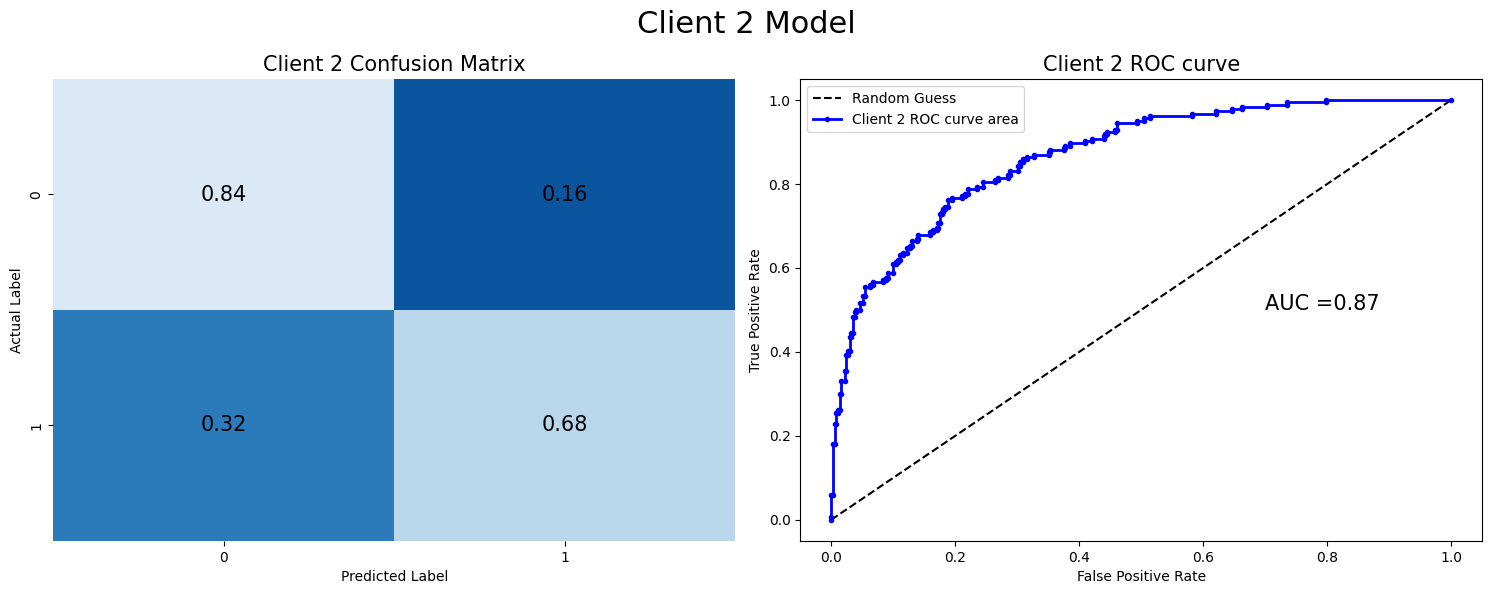

___________________________________________________________________________________________________ 

Client 2 Classification Report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       371
           1       0.68      0.68      0.68       184

    accuracy                           0.79       555
   macro avg       0.76      0.76      0.76       555
weighted avg       0.79      0.79      0.79       555

___________________________________________________________________________________________________

train_predict took 3.29 secs to execute


Train Accuracy: 1.00 | Test Accuracy: 0.82 | Recall: 0.68 | Precision: 0.80 | ROC-AUC: 0.88

ROC-AUC After 3-Fold Cross Validation:  0.82

 ___________________________________________________________________________________________________ 



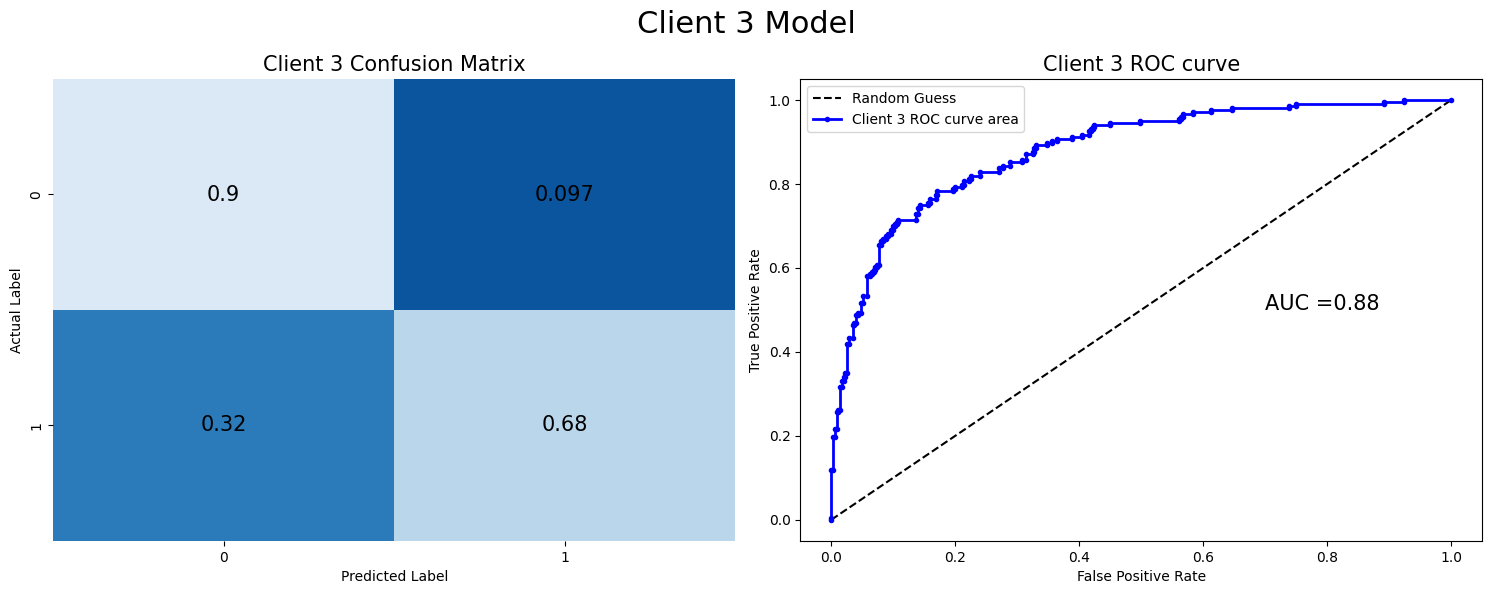

___________________________________________________________________________________________________ 

Client 3 Classification Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       351
           1       0.80      0.68      0.74       203

    accuracy                           0.82       554
   macro avg       0.82      0.79      0.80       554
weighted avg       0.82      0.82      0.82       554

___________________________________________________________________________________________________

train_predict took 3.06 secs to execute


Train Accuracy: 1.00 | Test Accuracy: 0.78 | Recall: 0.60 | Precision: 0.73 | ROC-AUC: 0.86

ROC-AUC After 3-Fold Cross Validation:  0.85

 ___________________________________________________________________________________________________ 



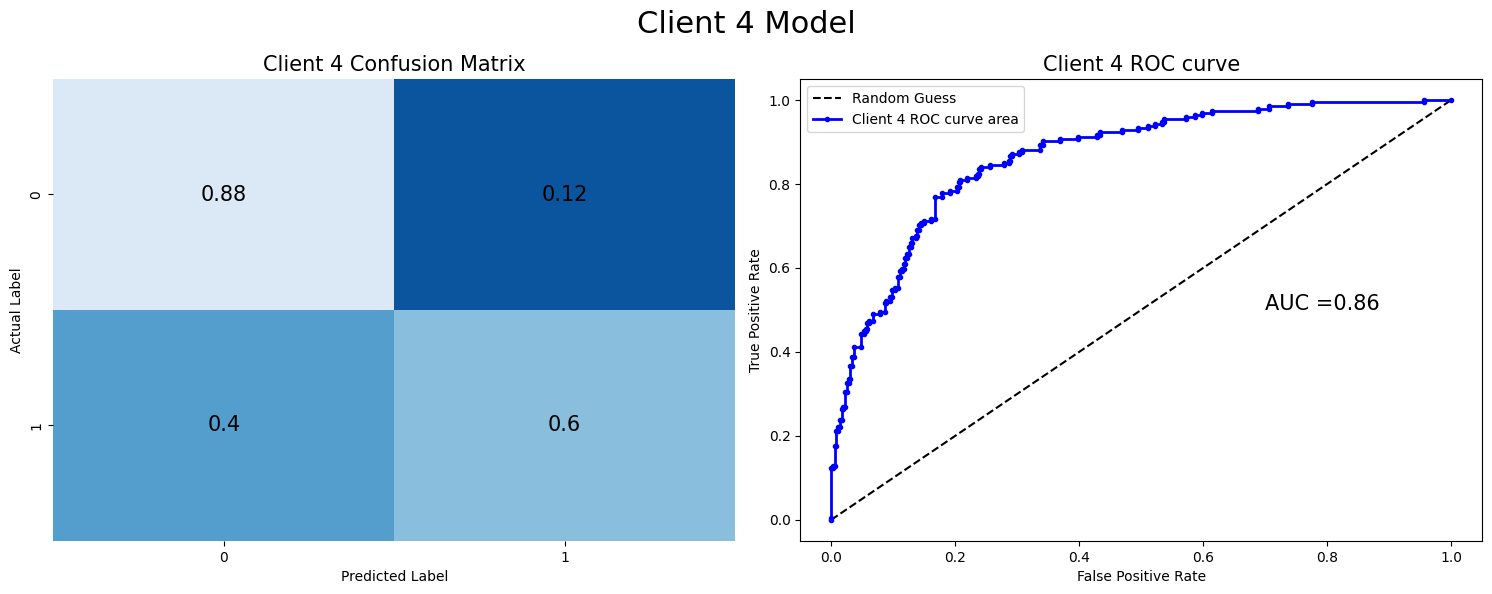

___________________________________________________________________________________________________ 

Client 4 Classification Report
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       360
           1       0.73      0.60      0.66       194

    accuracy                           0.78       554
   macro avg       0.77      0.74      0.75       554
weighted avg       0.78      0.78      0.78       554

___________________________________________________________________________________________________

train_predict took 3.08 secs to execute



In [23]:
for i in range(len(train_sets)):
    X_train, y_train = train_sets[i]
    X_val, y_val = val_sets[i] 
    client_result = train_predict(
        model3,  
        X_train, 
        y_train.values.squeeze(), 
        X_val, 
        y_val.values.squeeze(), 
        model_name=f"Client {i}"
    )

In [24]:
pd.DataFrame(client_result) 

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,3-Fold CV ROC-AUC
0,Logistic Regression,0.87,0.71,0.47,0.56,0.87,0.87
1,Random Forest,0.87,0.74,0.42,0.53,0.88,0.87
2,XGBoost,0.87,0.69,0.52,0.59,0.89,0.87
3,LightGBM,0.88,0.72,0.52,0.60,0.89,0.88
4,Client 0,0.80,0.69,0.69,0.69,0.87,0.85
5,Client 1,0.82,0.72,0.68,0.70,0.87,0.84
6,Client 2,0.79,0.68,0.68,0.68,0.87,0.82
7,Client 3,0.82,0.80,0.68,0.74,0.88,0.82
8,Client 4,0.78,0.73,0.60,0.66,0.86,0.85
